In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import image
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 
import tensorflow as tf


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pathtest = '/content/drive/MyDrive/Alzheimer_s Dataset-2/test'
pathtrain = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train'

In [5]:
class1 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/VeryMildDemented' 
class2 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/MildDemented'
class3 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/ModerateDemented'
class0 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/NonDemented'


In [6]:
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path)  
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
    
    for x in file_list:    
        img_path = os.path.join(curr_path,x) 
        img = imread(img_path)
        img = resize(img,(60,60,3))    
        img = img.flatten()
        image_array.append(img)
        
    return image_array
class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)

In [7]:

df1 = pd.DataFrame(class1_img)
df1['y']  = 1  
df2 = pd.DataFrame(class2_img)
df2['y']  = 2
df3 = pd.DataFrame(class3_img)
df3['y']  = 3
df0 = pd.DataFrame(class0_img)
df0['y']  = 0

df = pd.concat([df0,df1,df2,df3],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
df.shape

(5121, 10801)

<AxesSubplot:>

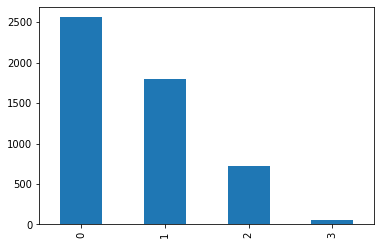

In [10]:
df['y'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Class Wise Distribution of data')

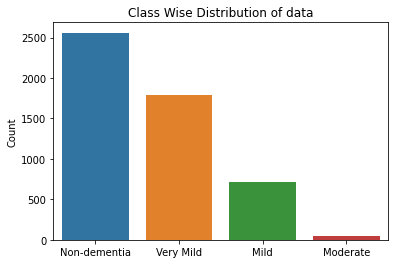

In [11]:
sns.barplot(x =['Non-dementia','Very Mild', 'Mild', 'Moderate'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')

In [19]:
import tensorflow as tf
from tensorflow import keras
import warnings
from tensorflow.keras import layers

# Load the dataset
train_data = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Alzheimer_s Dataset-2/train',
    image_size=(150, 150),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [17]:
test_data = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Alzheimer_s Dataset-2/test',
    image_size=(150, 150),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 1279 files belonging to 4 classes.
Using 255 files for validation.


In [20]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))


In [21]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 323s 2s/step - loss: 1.0083 - accuracy: 0.5079 - val_loss: 1.3689 - val_accuracy: 0.3804
Epoch 2/10
129/129 [==============================] - 249s 2s/step - loss: 0.8106 - accuracy: 0.6285 - val_loss: 1.3644 - val_accuracy: 0.3804
Epoch 3/10
129/129 [==============================] - 235s 2s/step - loss: 0.5337 - accuracy: 0.7737 - val_loss: 1.3671 - val_accuracy: 0.3804
Epoch 4/10
129/129 [==============================] - 234s 2s/step - loss: 0.3401 - accuracy: 0.8682 - val_loss: 1.3661 - val_accuracy: 0.3804
Epoch 5/10
129/129 [==============================] - 231s 2s/step - loss: 0.1281 - accuracy: 0.9566 - val_loss: 1.3662 - val_accuracy: 0.3804
Epoch 6/10
129/129 [==============================] - 238s 2s/step - loss: 0.0574 - accuracy: 0.9817 - val_loss: 1.3666 - val_accuracy: 0.3804
Epoch 7/10
129/129 [==============================] - 230s 2s/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 1.3668 - val_accuracy: 0.3804

In [24]:
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

8/8 [==============================] - 4s 409ms/step - loss: 1.3669 - accuracy: 0.3804
Test accuracy: 0.3803921639919281


In [25]:
model.save('alzheimer_cnn_model.h5')